In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import scipy.stats as stats
import random
import numpy as np
import math
!pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [2]:
# df1 = pd.read_excel("내 PC/cloudium 서버 (U:)/PCLOK II/00. 연구원 개인폴더/임은수/LOB,D_Raw.xlsx")
# print(df1.shape)
# df1.head(10)

In [3]:
blank_random = [random.random() for i in range(1,61)]
rep = [i for i in range(1,61)]
df2 = pd.DataFrame({'rep': rep, 'Blank' : blank_random})
df2.head(3)

,rep,Blank
0,1,0.557013
1,2,0.844893
2,3,0.359660


In [4]:
# df2=df1.rename(columns={'Unnamed: 1' : 'rep'}).drop(columns=['Unnamed: 0']).set_index('rep')

<AxesSubplot:xlabel='Blank', ylabel='Count'>

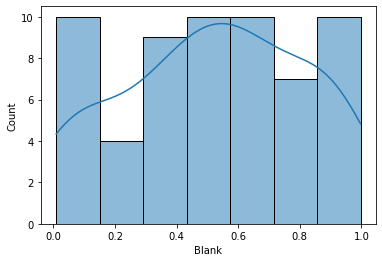

In [5]:
sns.histplot(data=df2, x='blank_Conc', kde = True)

In [6]:
# 정규성 검정, 귀무가설: 정규성이다. 대립가설: 정규성 아니다.
p_val=stats.normaltest(df2['blank_Conc'])[1]
p_val

0.014188589705615658

In [7]:
# print(len(df2['rep']))
# print(np.mean(df2['Blank']))
# print(np.std(df2['Blank']))

In [8]:
df3 = df2.sort_values(by= 'Blank')

### LOB
 1. two reagent lot
 2. one instrument system
 3. Tree days
 4. Four blank sample -> LOB
 5. Four low measurand sample (positive) -> LOD
 6. Two replicates per sample
 7. 60 total blank (low sample) replicates per reagent , 

#### 실수에서 정수부분 소수 부분 분리하는 함수 math.modf
a = 1.2345
math.modf(a)[0]

In [9]:
# df3['rank_position'] = df3['blank_Conc'].rank(method='dense')
# df3
# df4=df3[['Blank', 'rank_position']].loc[(df3['rank_position'] == 30)]
# df4

,Blank,rank_position
19,0.533476,30.0


In [12]:
# LOB ,a=bate = type
# K= Sample 종류 식을 생각해보지
B = len(df2['Result.no'])  # Total result of blank samples
M=df3['blank_Conc'].mean()
SD=df3['blank_Conc'].var()
if p_val > 0.05:
    R_P =  (0.5+B*0.95)
    if type(R_P) == float:
        df3['rank_position'] = df3['blank_Conc'].rank(method='dense')
        f=math.modf(R_P)[0]
        n=math.modf(R_P)[1]
        LoB = df3['blank_Conc'][n-1]+f*(df3['blank_Conc'][n-1]-df3['blank_Conc'][n-2])
        print(LoB)
else:
    c = (1.645 / (1-(1/(4*(B-6)))))
    LoB = M + c*SD
    print(LoB)
        
#         df4=df3[['Blank', 'rank_position']].loc[(df3['rank_position'] == round(rank_LoB))]
#         result = df4['rank_position'].tolist()[0]
#         print(df4)

0.6635991437697711


In [13]:
# LOD 5 day, 5 sample, 최소 sample lot day 합쳐서 40 반복

# randam_LOD = [random.uniform(1,5) for i in range(1,201)]
# rep_LOD = [i for i in range(1,201)]
# df5 = pd.DataFrame({'rep':rep_LOD, 'Low_sample':randam_LOD})
# df5.head(10)

,rep,Low_sample
0,1,1.841634
1,2,1.416914
2,3,4.826778
3,4,4.895480
4,5,3.606706
5,6,1.531054
6,7,1.409679
7,8,2.628041
8,9,4.599784
9,10,3.847766


In [44]:
LOD_raw = pd.read_excel("F:\LOD_Python.xlsx")
cond1 = (LOD_raw['Lot'] == 1)
cond2 = (LOD_raw['Sample'] == 'L1')
cond3 = (LOD_raw['Sample'] == 'L2')
cond4 = (LOD_raw['Sample'] == 'L3')
cond5 = (LOD_raw['Sample'] == 'L4')

lot1_L1 = LOD_raw.loc[cond1&cond2]
SD1=lot1_L1['conc'].std()
# LOD_raw.loc(cond1)
LOD_raw.columns

Index(['day', 'Lot', 'Sample', 'conc'], dtype='object')

<AxesSubplot:xlabel='conc', ylabel='Count'>

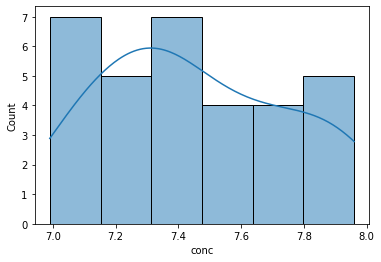

In [46]:
# 정규성 확인
sns.histplot(data=LOD_raw, x='conc', kde=True)

In [48]:
# 정규성 검정 : 귀무-정규성을 갖는다

p_low_sample = stats.normaltest(LOD_raw['conc'])
p_low_sample[1]

NormaltestResult(statistic=4.305863663323758, pvalue=0.11614314597049764)

In [ ]:

if p_low_sample[1] >0.5:
    

c = (1.645/(1-(1/(4(l-6)))))
LoD = LoB + c*df3['Blank'].std()
print(LoD)
